In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')

In [68]:
# df_pathway = pd.read_csv('../../data/c2.cp.kegg_medicus.v2023.2.Hs.symbols_info.csv')
# 对pathway_name进行去重，打印
# df_pathway['pathway_class'].drop_duplicates()

In [69]:
# Axitinib Navitoclax Picolinici-acid Campthotecin BMS-754807 Afatinib Erlotinib
# EGFR
drug_name = 'Afatinib' # 靶向药物 EGFR
# target_pathway = ['EGFR tyrosine kinase inhibitor resistance','Non-small cell lung cancer','MAPK signaling pathway','PI3K signaling','Cell cycle','Apoptosis,'Small cell lung cancer']
target_pathway = ['EGFR tyrosine kinase inhibitor resistance','Non-small cell lung cancer','MAPK signaling pathway','PI3K signaling','Cell cycle','Apoptosis']

In [70]:
dict = {
    "<PAD>": 0,"<UNK>": 1,"<START>": 2,"<STOP>": 3,"(": 4,")": 5,"1": 6,"2": 7,"3": 8,"4": 9,"5": 10,"6": 11,"7": 12,"8": 13,"9": 14,"%10": 15,"%11": 16,"%12": 17,"%13": 18,"%14": 19,"%15": 20,"%16": 21,"%17": 22,"%18": 23,"%19": 24,"%20": 25,"%21": 26,"%22": 27,"%23": 28,"%24": 29,"%25": 30,"%26": 31,"%27": 32,"%28": 33,"%29": 34,"O": 35,"N": 36,"=": 37,"C": 38," ": 39,"Cl": 40,".": 41,"[Pt]": 42,"F": 43,"S": 44,"#": 45,"I": 46,"[Pt+2]": 47,"[NH-]": 48,"[O-]": 49,"[N+]": 50,"B": 51,"P": 52,"Br": 53,"[S+]": 54,"[Br-]": 55
}

In [71]:
df_smiles = pd.read_csv('../../data/CCLE-GDSC-SMILES.csv')
df_smiles.head()

,CID,SMILES,DRUG_NAME
0,24360,CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3...,Camptothecin
1,13342,CCC1(CC2CC(C3=C(CCN(C2)C1)C4=CC=CC=C4N3)(C5=C(...,Vinblastine
2,5702198,N.N.Cl[Pt]Cl,Cisplatin
3,6253,C1=CN(C(=O)N=C1N)C2C(C(C(O2)CO)O)O,Cytarabine
4,148124,CC1=C2C(C(=O)C3(C(CC4C(C3C(C(C2(C)C)(CC1OC(=O)...,Docetaxel


In [72]:
# 筛选出药物是Oxaliplatin
df_smiles_single_drug = df_smiles[df_smiles['DRUG_NAME'] == drug_name]
df_smiles_single_drug.head()

,CID,SMILES,DRUG_NAME
15,10184653,CN(C)CC=CC(=O)NC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC(...,Afatinib


In [73]:
df_smiles_att = pd.read_csv('../../data/GEP_CellBlind_LUNG_smiles_attentions_gep.csv')
df_smiles_att.head()

,drug,OncotreeCode,cell_line,0,1,2,3,4,5,6,...,246,247,248,249,250,251,252,253,254,255
0,5-Fluorouracil,PCM,OPM2,0.002356,0.003071,0.002732,0.004914,0.004261,0.004978,0.001775,...,0.026119,0.028015,0.010345,0.021115,0.011152,0.008832,0.005626,0.006518,0.009014,0.005490
1,5-azacytidine,PCM,OPM2,0.002204,0.002897,0.002576,0.004770,0.004089,0.004820,0.001639,...,0.017020,0.008060,0.010243,0.006067,0.029940,0.015759,0.011790,0.008960,0.005428,0.005950
2,A-366,PCM,OPM2,0.002104,0.002775,0.002463,0.004676,0.003960,0.004714,0.001537,...,0.006011,0.005778,0.009135,0.004954,0.008338,0.016123,0.018105,0.010478,0.005555,0.005962
3,ABT737,PCM,OPM2,0.001874,0.002511,0.002220,0.004436,0.003700,0.004466,0.001332,...,0.005321,0.005187,0.006720,0.006663,0.007908,0.006287,0.005171,0.004562,0.009057,0.006331
4,AGI-5198,PCM,OPM2,0.001997,0.002653,0.002349,0.004567,0.003842,0.004599,0.001443,...,0.008812,0.008993,0.008153,0.015015,0.015713,0.017204,0.017644,0.010247,0.005821,0.006480


In [74]:
# 筛选出药物是Oxaliplatin
df_smiles_att_single_drug = df_smiles_att[df_smiles_att['drug'] == drug_name]
# 筛选出cell_line = ['EKVX','HCC827','LCLC103H','LU135','NCIH1299','NCIH146','NCIH1963','NCIH2170','NCIH2228','NCIH526','PC14','RERFLCSQ1']
# NSCLC:['EKVX','HCC827','LCLC103H','NCIH1299','NCIH2170','NCIH2228','PC14','RERFLCSQ1']
# LUAD:['NCIH2228','HCC827','EKVX','PC14']
# SCLC:['NCIH526','LU135','NCIH146','NCIH1963']
cell_line = ['NCIH2228','HCC827','EKVX','PC14']
# cell_line = ['NCIH526','LU135','NCIH146','NCIH1963']
df_smiles_att_single_drug = df_smiles_att_single_drug[df_smiles_att_single_drug['cell_line'].isin(cell_line)]
print(df_smiles_att_single_drug.shape)
df_smiles_att_single_drug.head()

(4, 259)


,drug,OncotreeCode,cell_line,0,1,2,3,4,5,6,...,246,247,248,249,250,251,252,253,254,255
9518,Afatinib,LUAD,HCC827,0.001971,0.002632,0.002310,0.004593,0.003830,0.004571,0.001438,...,0.006153,0.006081,0.006685,0.006693,0.006575,0.013138,0.007246,0.006324,0.003579,0.003808
9735,Afatinib,LUAD,PC14,0.001970,0.002625,0.002318,0.004572,0.003827,0.004562,0.001431,...,0.007383,0.008757,0.013536,0.005389,0.006258,0.006380,0.005671,0.004904,0.006168,0.004209
10184,Afatinib,LUAD,NCIH2228,0.001967,0.002613,0.002325,0.004612,0.003820,0.004547,0.001426,...,0.007148,0.011995,0.007606,0.007004,0.004739,0.003561,0.005895,0.004624,0.003614,0.004804
11448,Afatinib,LUAD,EKVX,0.001976,0.002633,0.002338,0.004606,0.003833,0.004563,0.001440,...,0.005372,0.004703,0.007317,0.004519,0.005003,0.008676,0.012862,0.006755,0.004393,0.004743


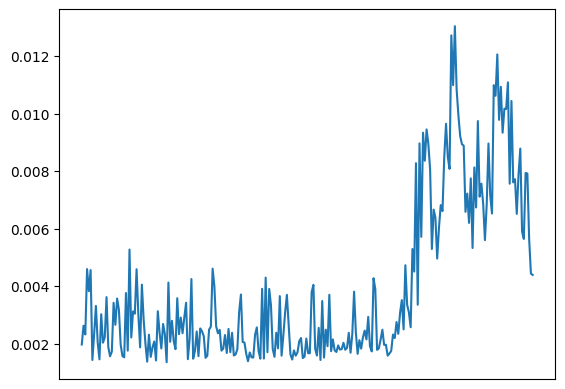

In [75]:
# 将df_smiles_att_oxaliplatin从第四列开始的数据取均值
df_smiles_att_single_drug_mean = df_smiles_att_single_drug.iloc[:, 3:].mean(axis=0)
# 将df_smiles_att_oxaliplatin_mean画成折线图
plt.plot(df_smiles_att_single_drug_mean)
# 不显示X轴的信息
plt.xticks([])
plt.show()

In [76]:
from pytoda.smiles import SMILESTokenizer
smiles_language_filepath = '../../../data/smiles_language/tokenizer_customized'
# Load SMILES language
smiles_language = SMILESTokenizer.from_pretrained(smiles_language_filepath)
smiles_language.set_encoding_transforms(
    add_start_and_stop=True,
    padding=True,
    padding_length=256,
    # padding_length=params.get("smiles_padding_length", None),
)
smiles_language.set_smiles_transforms(
    augment=False,
    canonical=False,
    kekulize=False,
    all_bonds_explicit=False,
    all_hs_explicit=False,
    remove_bonddir=False,
    remove_chirality=False,
    selfies=False,
    sanitize=False,
)
smiles_language.add_dataset(df_smiles['SMILES'])

In [77]:
single_drug = smiles_language.smiles_to_token_indexes(df_smiles[df_smiles['DRUG_NAME'] == drug_name]['SMILES'].values[0])
single_drug_num_array = np.array(single_drug)
type(single_drug_num_array)

numpy.ndarray

In [78]:
# 根据dict将Oxaliplatin从数字替换成字符
single_drug_strs = [list(dict.keys())[list(dict.values()).index(i)] for i in single_drug]
# 将Oxaliplatin转换成ndarray
single_drug_strs = np.array(single_drug_strs)
type(single_drug_strs)

numpy.ndarray

In [79]:
df_smiles_att_oxaliplatin_mean = df_smiles_att_single_drug_mean.to_numpy()
type(df_smiles_att_oxaliplatin_mean)

numpy.ndarray

In [80]:
single_drug_observe = np.vstack([single_drug_num_array, single_drug_strs, df_smiles_att_oxaliplatin_mean])
single_drug_observe

array([['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0'

In [81]:
start = 189
end = 255
# 取single_drug_observe224-255的数据
single_drug_observe_224_255 = single_drug_observe[:, start:end]
# dataframe
# single_drug_observe_224_255 = pd.DataFrame(single_drug_observe_224_255)
single_drug_observe_224_255

array([['38', '36', '4', '38', '5', '38', '38', '37', '38', '38', '4',
        '37', '35', '5', '36', '38', '6', '37', '38', '4', '38', '37',
        '38', '7', '38', '4', '37', '38', '6', '5', '38', '4', '37',
        '36', '38', '37', '36', '7', '5', '36', '38', '8', '37', '38',
        '38', '4', '37', '38', '4', '38', '37', '38', '8', '5', '43',
        '5', '40', '5', '35', '38', '9', '38', '38', '35', '38', '9'],
       ['C', 'N', '(', 'C', ')', 'C', 'C', '=', 'C', 'C', '(', '=', 'O',
        ')', 'N', 'C', '1', '=', 'C', '(', 'C', '=', 'C', '2', 'C', '(',
        '=', 'C', '1', ')', 'C', '(', '=', 'N', 'C', '=', 'N', '2', ')',
        'N', 'C', '3', '=', 'C', 'C', '(', '=', 'C', '(', 'C', '=', 'C',
        '3', ')', 'F', ')', 'Cl', ')', 'O', 'C', '4', 'C', 'C', 'O', 'C',
        '4'],
       ['0.008278322', '0.0033555665000000005', '0.0089678065',
        '0.005715600249999999', '0.009339120999999999', '0.00836279775',
        '0.00945176375', '0.0089462565', '0.0080562042499999

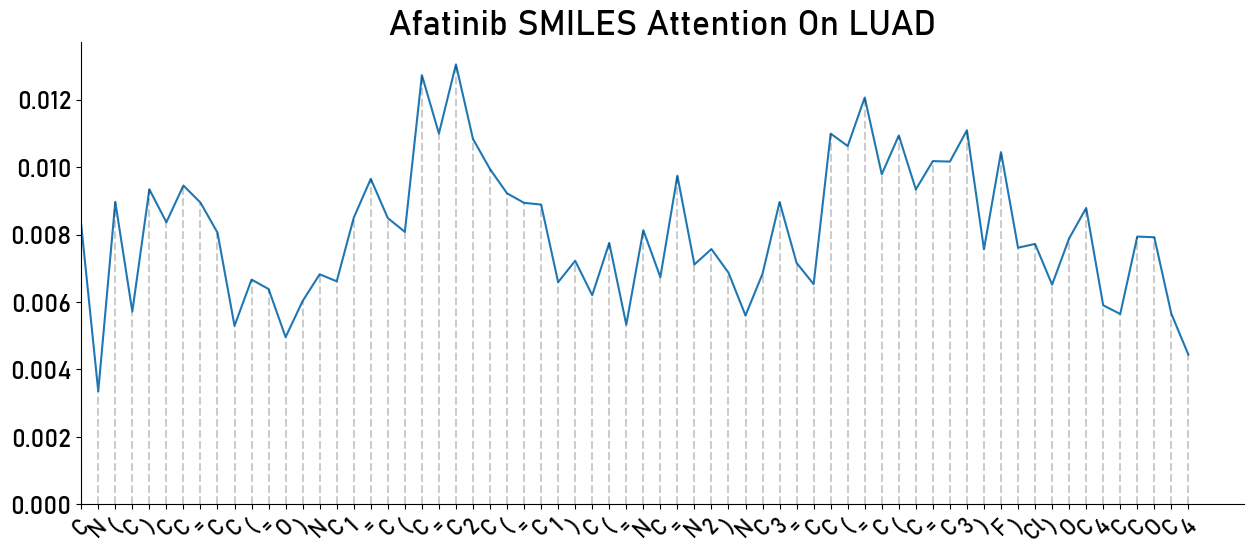

In [159]:
# 将single_drug_observe_224_255画成折线图,第三行是attention，是数值型，所以画成折线图
# 将single_drug_observe_224_255[2]变成浮点数  
single_drug_observe_y = single_drug_observe_224_255[2].astype(float)
single_drug_observe_x = single_drug_observe_224_255[1]
plt.style.use('default')
# 设置全局字体
plt.rcParams['font.sans-serif'] = ['Bahnschrift']
plt.rcParams['axes.unicode_minus'] = False
# 将画布设置宽一点
plt.figure(figsize=(15, 6))
plt.plot(single_drug_observe_y)
# 每个点与X轴加上虚线
for i in range(len(single_drug_observe_y)):
    plt.vlines(i, 0, single_drug_observe_y[i], linestyles='dashed', colors='black', alpha=0.2)
# 取消上边框
plt.gca().spines['top'].set_visible(False)
# 取消右边框
plt.gca().spines['right'].set_visible(False)
# title
plt.title(drug_name + ' SMILES Attention On LUAD', fontsize=25)
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=18)
plt.xticks(np.arange(end - start), single_drug_observe_x)
plt.ylim(bottom=0)
plt.xlim(left=0)

plt.savefig(drug_name + '_SMILES_Attention_Observation.png', dpi=300, bbox_inches='tight')
plt.show()

In [83]:
df_pathways_att = pd.read_csv('../../data/GEP_CellBlind_LUNG_pathway_attention.csv')
# 筛选出drug = Oxaliplatin
df_pathways_att_single_drug = df_pathways_att[df_pathways_att['drug'] == drug_name]
# 筛选出cell_line = ['NCIH2172','CHAGOK1','LCLC103H','NCIH1299','NCIH2170','RERFLCSQ1','NCIH146','NCIH526','NCIH1963','LU135','PC14','HCC827','NCIH2228']
df_pathways_att_single_drug = df_pathways_att_single_drug[df_pathways_att_single_drug['cell_line'].isin(cell_line)]
print(df_pathways_att_single_drug.shape)
df_pathways_att_single_drug.head()

(4, 622)


,drug,cell_line,OncotreeCode,KEGG_MEDICUS_ENV_FACTOR_ARSENIC_TO_ELECTRON_TRANSFER_IN_COMPLEX_IV,KEGG_MEDICUS_ENV_FACTOR_BENZO_A_PYRENRE_TO_CYP_MEDIATED_METABOLISM,KEGG_MEDICUS_ENV_FACTOR_BPA_TO_RAS_ERK_SIGNALING_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_DCE_TO_DNA_ADDUCTS,KEGG_MEDICUS_ENV_FACTOR_E2_TO_NUCLEAR_INITIATED_ESTROGEN_SIGNALING_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_E2_TO_RAS_ERK_SIGNALING_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_IRON_TO_ANTEROGRADE_AXONAL_TRANSPORT,...,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_26S_PROTEASOME_MEDIATED_PROTEIN_DEGRADATION,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_MGLUR5_CA2_APOPTOTIC_PATHWAY,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_PERK_ATF4_SIGNALING_PATHWAY,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_PRNP_PI3K_NOX2_SIGNALING_PATHWAY,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_TRANSPORT_OF_CALCIUM,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_VGCC_CA2_APOPTOTIC_PATHWAY,KEGG_MEDICUS_VARIANT_TEL_AML1_FUSION_TO_TRANSCRIPTIONAL_REPRESSION,KEGG_MEDICUS_VARIANT_TGFA_OVEREXPRESSION_TO_PI3K_SIGNALING_PATHWAY,KEGG_MEDICUS_VARIANT_TMPRSS2_ERG_FUSION_TO_TRANSCRIPTIONAL_ACTIVATION,KEGG_MEDICUS_VARIANT_TRK_FUSION_KINASE_TO_RAS_ERK_SIGNALING_PATHWAY
9518,Afatinib,HCC827,LUAD,0.001361,0.001451,0.001533,0.001780,0.001739,0.001577,0.001579,...,0.001534,0.001367,0.001481,0.001404,0.001404,0.001735,0.002486,0.001388,0.002449,0.001514
9735,Afatinib,PC14,LUAD,0.001361,0.001603,0.001534,0.001657,0.001743,0.001578,0.001582,...,0.001535,0.001388,0.001494,0.001404,0.001403,0.001564,0.002659,0.001391,0.002445,0.001504
10184,Afatinib,NCIH2228,LUAD,0.001362,0.001529,0.001535,0.001829,0.001740,0.001579,0.001586,...,0.001536,0.001404,0.001521,0.001404,0.001405,0.001734,0.002478,0.001390,0.002448,0.001509
11448,Afatinib,EKVX,LUAD,0.001361,0.001519,0.001534,0.001520,0.001740,0.001578,0.001578,...,0.001534,0.001401,0.001481,0.001402,0.001405,0.001730,0.002479,0.001393,0.002450,0.001519


In [84]:
# 将df_pathways_att_oxaliplatin从第四列开始的数据取均值
df_pathways_single_drug_mean = df_pathways_att_single_drug.iloc[:, 3:].mean(axis=0)
df_pathways_single_drug_mean.head()

KEGG_MEDICUS_ENV_FACTOR_ARSENIC_TO_ELECTRON_TRANSFER_IN_COMPLEX_IV            0.001361
KEGG_MEDICUS_ENV_FACTOR_BENZO_A_PYRENRE_TO_CYP_MEDIATED_METABOLISM            0.001526
KEGG_MEDICUS_ENV_FACTOR_BPA_TO_RAS_ERK_SIGNALING_PATHWAY                      0.001534
KEGG_MEDICUS_ENV_FACTOR_DCE_TO_DNA_ADDUCTS                                    0.001697
KEGG_MEDICUS_ENV_FACTOR_E2_TO_NUCLEAR_INITIATED_ESTROGEN_SIGNALING_PATHWAY    0.001741
dtype: float64

In [85]:
df_pathways_info_origin = pd.read_csv('../../data/c2.cp.kegg_medicus.v2023.2.Hs.symbols_info.csv')
df_pathways_info_origin.head()

,Unnamed: 0,pathway_name,pathway_id,pathway_type,pathway_class
0,0,KEGG_MEDICUS_ENV_FACTOR_ARSENIC_TO_ELECTRON_TR...,N01394,Env factor,Mitochondrial ROS formation
1,1,KEGG_MEDICUS_ENV_FACTOR_BENZO_A_PYRENRE_TO_CYP...,N01401,Env factor,CYP-mediated ROS formation
2,2,KEGG_MEDICUS_ENV_FACTOR_BPA_TO_RAS_ERK_SIGNALI...,N01352,Env factor,ERK signaling
3,3,KEGG_MEDICUS_ENV_FACTOR_DCE_TO_DNA_ADDUCTS,N01386,Env factor,DNA adduct formation
4,4,KEGG_MEDICUS_ENV_FACTOR_E2_TO_NUCLEAR_INITIATE...,N01364,Env factor,Nuclear receptor signaling


In [86]:
# 筛选出pathway_class是target_pathway的数据  暂时抛弃
df_pathways_info = df_pathways_info_origin[df_pathways_info_origin['pathway_class'].isin(target_pathway)]
# 筛选出df_pathways_info中pathway_name包含EGFR或者ERBB2的数据
# df_pathways_info = df_pathways_info_origin[df_pathways_info_origin['pathway_name'].str.contains('EGFR|ERBB2')]
print(df_pathways_info.shape)
df_pathways_info.head()

(41, 5)


,Unnamed: 0,pathway_name,pathway_id,pathway_type,pathway_class
12,12,KEGG_MEDICUS_ENV_FACTOR_NICOTINE_NNK_TO_PI3K_S...,N01348,Env factor,PI3K signaling
13,13,KEGG_MEDICUS_ENV_FACTOR_NNK_NNN_TO_CHRNA7_E2F_...,N01337,Env factor,Cell cycle
14,14,KEGG_MEDICUS_ENV_FACTOR_NNK_NNN_TO_PI3K_SIGNAL...,N01339,Env factor,PI3K signaling
15,15,KEGG_MEDICUS_ENV_FACTOR_NNK_NNN_TO_PI3K_SIGNAL...,N01350,Env factor,PI3K signaling
67,67,KEGG_MEDICUS_PATHOGEN_HPV_E7_TO_PP2A_AKT_SIGNA...,N00356,Pathogen,PI3K signaling


In [87]:
df_gep = pd.read_csv('../../data/GeneExp_Wilcoxon_test_Analysis_Log10_P_value_C2_KEGG_MEDICUS.csv')
# 筛选出cell_line = ['NCIH2172','CHAGOK1','LCLC103H','NCIH1299','NCIH2170','RERFLCSQ1','NCIH146','NCIH526','NCIH1963','LU135','PC14','HCC827','NCIH2228']
df_gep = df_gep[df_gep['cell_line'].isin(cell_line)]
# 从第二列开始取均值
df_gep_mean = df_gep.iloc[:, 1:].mean(axis=0)
df_gep_mean.head()

KEGG_MEDICUS_ENV_FACTOR_ARSENIC_TO_ELECTRON_TRANSFER_IN_COMPLEX_IV            4.297276
KEGG_MEDICUS_ENV_FACTOR_BENZO_A_PYRENRE_TO_CYP_MEDIATED_METABOLISM            1.176685
KEGG_MEDICUS_ENV_FACTOR_BPA_TO_RAS_ERK_SIGNALING_PATHWAY                      2.046436
KEGG_MEDICUS_ENV_FACTOR_DCE_TO_DNA_ADDUCTS                                    0.314107
KEGG_MEDICUS_ENV_FACTOR_E2_TO_NUCLEAR_INITIATED_ESTROGEN_SIGNALING_PATHWAY    0.981642
dtype: float64

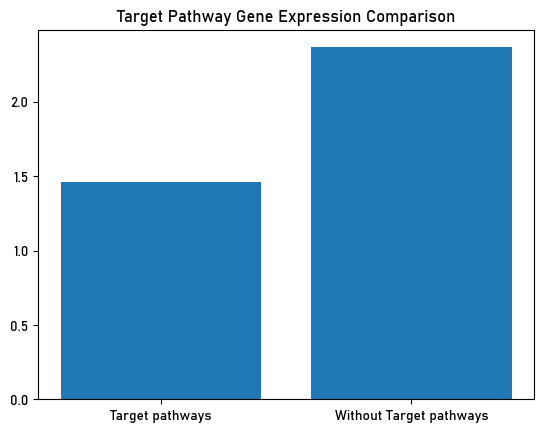

In [88]:
# 从df_gep_mean取出DNA_replication的数据
df_gep_mean_DNA_replication = df_gep_mean[df_gep_mean.index.isin(df_pathways_info['pathway_name'])]
df_gep_mean_without_DNA_replication = df_gep_mean[~df_gep_mean.index.isin(df_pathways_info['pathway_name'])]
# 算出两个数据的均值，画柱状图
plt.bar(['Target pathways', 'Without Target pathways'], [df_gep_mean_DNA_replication.mean(), df_gep_mean_without_DNA_replication.mean()])
#title
plt.title('Target Pathway Gene Expression Comparison')
plt.show()

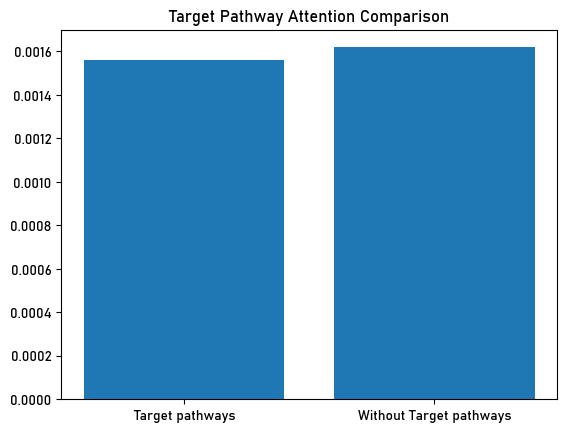

In [89]:
DNA_replication_pathways = df_pathways_info['pathway_name']
# 从df_pathways_att_oxaliplatin_mean取出DNA_replication_pathways的数据
df_pathways_att_oxaliplatin_mean_DNA_replication = df_pathways_single_drug_mean[df_pathways_single_drug_mean.index.isin(DNA_replication_pathways)]
df_pathways_att_mean_without_DNA_replication = df_pathways_single_drug_mean[~df_pathways_single_drug_mean.index.isin(DNA_replication_pathways)]
# 算出两个数据的均值，画柱状图
plt.bar(['Target pathways', 'Without Target pathways'], [df_pathways_att_oxaliplatin_mean_DNA_replication.mean(), df_pathways_att_mean_without_DNA_replication.mean()])
#title
plt.title('Target Pathway Attention Comparison')
plt.show()

In [90]:
# 将df_pathways_single_drug_mean设置为dataframe
df_pathways_single_drug_mean = pd.DataFrame(df_pathways_single_drug_mean)
df_pathways_single_drug_mean.columns = ['attention']
df_pathways_single_drug_mean['pathway_name'] = df_pathways_single_drug_mean.index

In [91]:
df_pathways_single_drug_mean.reset_index(drop=True, inplace=True)
# 根据attention排序
df_pathways_single_drug_mean = df_pathways_single_drug_mean.sort_values(by='attention', ascending=False)
print(df_pathways_single_drug_mean.shape)
df_pathways_single_drug_mean.head()

(619, 2)


,attention,pathway_name
208,0.002677,KEGG_MEDICUS_REFERENCE_DNA_DEGRADATION_BY_EXTR...
389,0.002676,KEGG_MEDICUS_REFERENCE_PURINE_SALVAGE_PATHWAY_...
354,0.002674,KEGG_MEDICUS_REFERENCE_NOTCH_LIGAND_UBIQUITYLA...
288,0.002674,KEGG_MEDICUS_REFERENCE_IGG_FCGR_RAC_SIGNALING_...
480,0.002672,KEGG_MEDICUS_VARIANT_AMPLIFIED_MYCN_TO_TRANSCR...


In [92]:
# 将df_pathways_single_drug_mean与df_pathways_info合并
df_pathways_single_drug_mean_merge = pd.merge(df_pathways_single_drug_mean, df_pathways_info, on='pathway_name')
print(df_pathways_single_drug_mean_merge.shape)
df_pathways_single_drug_mean_merge.head()

(41, 6)


,attention,pathway_name,Unnamed: 0,pathway_id,pathway_type,pathway_class
0,0.002666,KEGG_MEDICUS_REFERENCE_NRG_ERBB4_PI3K_SIGNALIN...,358,N01163,Reference,PI3K signaling
1,0.002508,KEGG_MEDICUS_REFERENCE_BCR_BCAP_CD19_PI3K_SIGN...,141,N01695,Reference,PI3K signaling
2,0.002330,KEGG_MEDICUS_REFERENCE_GPCR_PI3K_SIGNALING_PAT...,266,N01657,Reference,PI3K signaling
3,0.002269,KEGG_MEDICUS_REFERENCE_PDL_PD1_SHP_PI3K_SIGNAL...,377,N01165,Reference,PI3K signaling
4,0.001668,KEGG_MEDICUS_REFERENCE_P4_PR_PI3K_SIGNALING_PA...,372,N01358,Reference,PI3K signaling


In [93]:
# 将df_pathways_single_drug_mean中pathway_name列存在在DNA_replication_pathways中，颜色标注为红色，其余为蓝色
df_pathways_single_drug_mean['color'] = np.where(df_pathways_single_drug_mean['pathway_name'].isin(DNA_replication_pathways), 'r', 'b')
# 重置索引
df_pathways_single_drug_mean.reset_index(drop=True, inplace=True)
df_pathways_single_drug_mean.head(50)

,attention,pathway_name,color
0,0.002677,KEGG_MEDICUS_REFERENCE_DNA_DEGRADATION_BY_EXTR...,b
1,0.002676,KEGG_MEDICUS_REFERENCE_PURINE_SALVAGE_PATHWAY_...,b
2,0.002674,KEGG_MEDICUS_REFERENCE_NOTCH_LIGAND_UBIQUITYLA...,b
3,0.002674,KEGG_MEDICUS_REFERENCE_IGG_FCGR_RAC_SIGNALING_...,b
4,0.002672,KEGG_MEDICUS_VARIANT_AMPLIFIED_MYCN_TO_TRANSCR...,b
5,0.002671,KEGG_MEDICUS_REFERENCE_PURINE_SALVAGE_PATHWAY_...,b
6,0.002671,KEGG_MEDICUS_VARIANT_MUTATION_ACTIVATED_GRM1_T...,b
7,0.002670,KEGG_MEDICUS_REFERENCE_ANGII_AT1R_NOX2_SIGNALI...,b
8,0.002668,KEGG_MEDICUS_REFERENCE_BETA_OXIDATION_ACYL_COA...,b
9,0.002666,KEGG_MEDICUS_REFERENCE_NRG_ERBB4_PI3K_SIGNALIN...,r


中值: 0.0015335204999999998


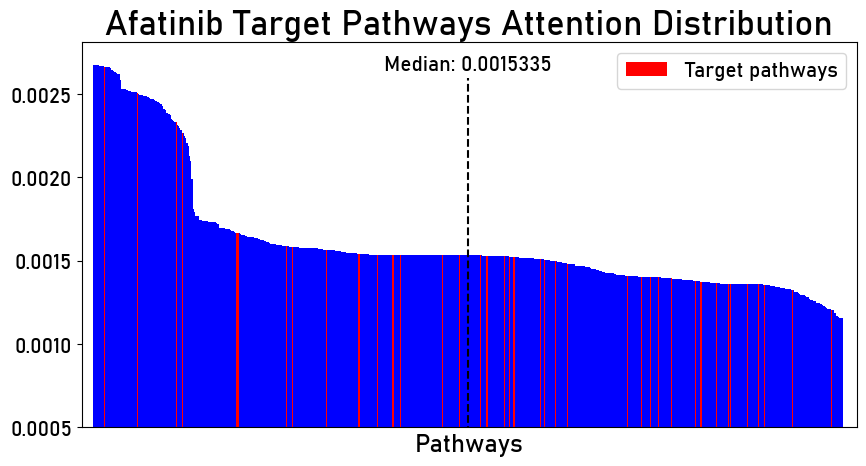

In [165]:
# 设置画布大小
plt.figure(figsize=(10, 5))
# 画出df_pathways_single_drug_mean的柱状图
plt.bar(df_pathways_single_drug_mean['pathway_name'], df_pathways_single_drug_mean['attention'], color=df_pathways_single_drug_mean['color'],width=1)
# 在柱状图的中值上画一条竖线,在竖线上标注中值
plt.vlines(309, 0, 0.0026, linestyles='dashed', colors='black', alpha=1)
# plt.text(309, 0.0026, 'Median', ha='center', va='bottom', fontsize=10)
# 在图中标注中值
plt.text(309, 0.00262, 'Median: 0.0015335', ha='center', va='bottom', fontsize=15)
# 画一个label：红色代表Target pathways
plt.bar([0], [0], color='r', label='Target pathways')
# 画一个label：蓝色代表Without Target pathways
# plt.bar([0], [0], color='b', label='Without Target pathways')
# 显示label
plt.legend(fontsize=15)
# 打印出中值
print('中值:',df_pathways_single_drug_mean['attention'].median())
plt.title(drug_name + ' Target Pathways Attention Distribution', fontsize=25)
plt.xticks([])
plt.yticks(fontsize=15)
plt.ylim(bottom=0.0005)
plt.xlim(left=-10, right=630)
plt.xlabel('Pathways', fontsize=18)
# 保存图片
plt.savefig(drug_name + '_NSCLC_Target_Pathway_Attention_Distribution.png', dpi=300, bbox_inches='tight')
plt.show()

In [95]:
# 帮我找出所有color为r的index
target_pathways = df_pathways_single_drug_mean[df_pathways_single_drug_mean['color'] == 'r']
# 将每个index除以618，得到比例
p = (target_pathways.index+1) / 619
print('所占百分比:',p)

所占百分比: Index([0.01615508885298869, 0.05977382875605816, 0.11147011308562198,
       0.11954765751211632, 0.19224555735056542,  0.1938610662358643,
       0.25848142164781907,  0.2665589660743134, 0.31179321486268174,
        0.3554119547657512, 0.37964458804523427, 0.40064620355411956,
       0.41033925686591277,  0.4668820678513732,  0.4894991922455573,
        0.5169628432956381,  0.5250403877221325,  0.5266558966074314,
        0.5492730210016155,   0.555735056542811,  0.5621970920840065,
        0.5977382875605816,  0.6025848142164781,   0.617124394184168,
        0.6332794830371568,  0.7140549273021002,  0.7318255250403877,
        0.7447495961227787,  0.7544426494345718,  0.7722132471728594,
        0.8045234248788369,  0.8109854604200323,  0.8126009693053312,
        0.8319870759289176,  0.8481421647819063,   0.851373182552504,
        0.8739903069466882,  0.8885298869143781,  0.8966074313408724,
        0.9337641357027464,  0.9854604200323102],
      dtype='float64')


In [96]:
# 将df_pathways_single_drug_mean与df_pathways_info合并
df_pathways_single_drug_mean_merge = pd.merge(df_pathways_single_drug_mean, df_pathways_info, on='pathway_name')
print(df_pathways_single_drug_mean_merge.shape)
df_pathways_single_drug_mean_merge.head(100)

(41, 7)


,attention,pathway_name,color,Unnamed: 0,pathway_id,pathway_type,pathway_class
0,0.002666,KEGG_MEDICUS_REFERENCE_NRG_ERBB4_PI3K_SIGNALIN...,r,358,N01163,Reference,PI3K signaling
1,0.002508,KEGG_MEDICUS_REFERENCE_BCR_BCAP_CD19_PI3K_SIGN...,r,141,N01695,Reference,PI3K signaling
2,0.002330,KEGG_MEDICUS_REFERENCE_GPCR_PI3K_SIGNALING_PAT...,r,266,N01657,Reference,PI3K signaling
3,0.002269,KEGG_MEDICUS_REFERENCE_PDL_PD1_SHP_PI3K_SIGNAL...,r,377,N01165,Reference,PI3K signaling
4,0.001668,KEGG_MEDICUS_REFERENCE_P4_PR_PI3K_SIGNALING_PA...,r,372,N01358,Reference,PI3K signaling
5,0.001668,KEGG_MEDICUS_REFERENCE_EGF_EGFR_PLCG_ERK_SIGNA...,r,223,N00023,Reference,Non-small cell lung cancer
6,0.001589,KEGG_MEDICUS_REFERENCE_FAS_JNK_SIGNALING_PATHWAY,r,242,N01056,Reference,Apoptosis
7,0.001583,KEGG_MEDICUS_REFERENCE_EGF_EGFR_PI3K_NFKB_SIGN...,r,219,N00390,Reference,PI3K signaling
8,0.001567,KEGG_MEDICUS_REFERENCE_ICOSLG_ICOS_PI3K_SIGNAL...,r,282,N01696,Reference,PI3K signaling
9,0.001542,KEGG_MEDICUS_REFERENCE_GF_RTK_PI3K_SIGNALING_P...,r,252,N01656,Reference,PI3K signaling


In [97]:
# 将df_pathways_single_drug_mean与df_pathways_info_origin合并
df_pathways_single_drug_mean_merge_origin = pd.merge(df_pathways_single_drug_mean, df_pathways_info_origin, on='pathway_name')
print(df_pathways_single_drug_mean_merge_origin.shape)
df_pathways_single_drug_mean_merge_origin.head(200)

(619, 7)


,attention,pathway_name,color,Unnamed: 0,pathway_id,pathway_type,pathway_class
0,0.002677,KEGG_MEDICUS_REFERENCE_DNA_DEGRADATION_BY_EXTR...,b,208,N01571,Reference,CGAS-STING signaling
1,0.002676,KEGG_MEDICUS_REFERENCE_PURINE_SALVAGE_PATHWAY_...,b,389,N01421,Reference,Purine salvage pathway
2,0.002674,KEGG_MEDICUS_REFERENCE_NOTCH_LIGAND_UBIQUITYLA...,b,354,N01479,Reference,NOTCH signaling
3,0.002674,KEGG_MEDICUS_REFERENCE_IGG_FCGR_RAC_SIGNALING_...,b,288,N01090,Reference,Cytoskeletal regulation (viruses and bacteria)
4,0.002672,KEGG_MEDICUS_VARIANT_AMPLIFIED_MYCN_TO_TRANSCR...,b,480,N00132,Variant,Transcription
...,...,...,...,...,...,...,...
195,0.001565,KEGG_MEDICUS_PATHOGEN_EBV_EBNA3C_TO_CELL_CYCLE...,b,25,N00483,Pathogen,Epstein-Barr virus (EBV)
196,0.001563,KEGG_MEDICUS_VARIANT_NOTCH_OVEREXPRESSION_TO_N...,b,606,N00087,Variant,Breast cancer
197,0.001562,KEGG_MEDICUS_REFERENCE_AGE_RAGE_SIGNALING_PATHWAY,b,113,N00994,Reference,Alzheimer disease
198,0.001562,KEGG_MEDICUS_VARIANT_MUTATION_CAUSED_ABERRANT_...,b,553,N01158,Variant,Amyotrophic lateral sclerosis
